# Required Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

***
# 1. **Description**
## 1-1. **Project Descriptionand its Goal**
Unfortunately, workers in tech industry are relatively vulnerable against mental illness (in my understanding).

In this project, I'd like to develop a model to predict mental illness from responses against related questions, which is gathered by OSMH (Open Source Mental Health). So the problem is basically classification to identify the subject is currently suffering from mental disorder.

## 1-2. **Dataset Description**
OSMH Mental Health in Tech Survey 2016

Data is gathered by OSMH (Open Source Mental Health) https://osmhhelp.org/index.html in 2016.
Data includes around 1433 responses. Survey aims to measure attitudes towards mental health in the tech workplace, and examine the frequency of mental health disorders among tech workers.

Data is avaialble [here](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-2016).

***
# 2. **Load Dataset and Do some EDA**
## 2-1. **Datatype and columns names**
Dataset is summarized in table format. Columns are the questions given to the subjects and values are responses. 

As you can see, column names are sentences given to subjects. And values are mostly composed of categorical values.

In [2]:
df = pd.read_csv("./mental-heath-in-tech-2016_20161114.csv")

# Data has 1433 answers with 63-1 questions.
print(df.shape)

# columns are questions given to the subject
for i, c in enumerate(df.columns):
    print(i, df[c].dtype, "::", c)

(1433, 63)
0 int64 :: Are you self-employed?
1 object :: How many employees does your company or organization have?
2 float64 :: Is your employer primarily a tech company/organization?
3 float64 :: Is your primary role within your company related to tech/IT?
4 object :: Does your employer provide mental health benefits as part of healthcare coverage?
5 object :: Do you know the options for mental health care available under your employer-provided coverage?
6 object :: Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
7 object :: Does your employer offer resources to learn more about mental health concerns and options for seeking help?
8 object :: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
9 object :: If a mental health issue prompted you to request a medical leave from work, asking for that leave would b

## 2-2. **Data Summary**
It looks that each column has relatively few variations (unique values).

In [3]:
df.describe(include = ['O'])

,How many employees does your company or organization have?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,...,"If so, what condition(s) were you diagnosed with?","If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
count,1146,1146,1013,1146,1146,1146,1146,1146,1146,1146,...,711,1433,1433,1430,1433,840,1433,851,1433,1433
unique,6,4,3,3,3,3,6,3,3,3,...,116,5,5,70,53,47,53,48,264,3
top,26-100,Yes,No,No,No,I don't know,Somewhat easy,Maybe,No,Maybe,...,"Mood Disorder (Depression, Bipolar Disorder, etc)",Not applicable to me,Often,Male,United States of America,California,United States of America,California,Back-end Developer,Sometimes
freq,292,531,354,813,531,742,281,487,837,479,...,187,557,538,610,840,130,851,141,263,757


## 2-3. **Data Cleaning**
### 2-3-1. **Count null values, and choose features to be deleted/imputed**
It looks there are lots of null values in some of the columns.

In [4]:
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
features_to_be_deleted = []
features_to_be_imputed = []

for c in df.columns:
    string_null = np.array([x in a[2:] for x in df[c]])    
    num_nulls = df[c].isnull().sum() + string_null.sum()
    if num_nulls > 150:
        features_to_be_deleted.append(c)
        print("DEL", c, df[c].isnull().sum(), string_null.sum())
    if num_nulls > 0 and num_nulls < 150:
        features_to_be_imputed.append(c)
        print("IMP", c, df[c].isnull().sum(), string_null.sum())


print(len(features_to_be_deleted))
print(len(features_to_be_imputed))

DEL How many employees does your company or organization have? 287 0
DEL Is your employer primarily a tech company/organization? 287 0
DEL Is your primary role within your company related to tech/IT? 1170 0
DEL Does your employer provide mental health benefits as part of healthcare coverage? 287 0
DEL Do you know the options for mental health care available under your employer-provided coverage? 420 0
DEL Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)? 287 0
DEL Does your employer offer resources to learn more about mental health concerns and options for seeking help? 287 0
DEL Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer? 287 0
DEL If a mental health issue prompted you to request a medical leave from work, asking for that leave would be: 287 0
DEL Do you think that discussing a mental health disorder wit

### 2-3-2. **Drop data with too much NULLs**
After removal, we can see data with fewer columns.

As you can see, values are mostly composed of answer for the given question.

In [5]:
# drop columns with too many nulls
df_ = df.drop(features_to_be_deleted, axis=1)

# impute columns with relatively few nulls
for c in features_to_be_imputed:
    if df_[c].dtype == object:
        df_[c].fillna(df_[c].mode().iloc[-1], inplace=True)

df_.head()

,Are you self-employed?,Do you have previous employers?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Would you bring up a mental health issue with a potential employer in an interview?,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,How willing would you be to share with friends and family that you have a mental illness?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Do you have a family history of mental illness?,Have you had a mental health disorder in the past?,...,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What country do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,1,Maybe,Maybe,Maybe,"No, I don't think they would",Somewhat open,No,No,Yes,...,Yes,0,Not applicable to me,Not applicable to me,39,Male,United Kingdom,United Kingdom,Back-end Developer,Sometimes
1,0,1,Maybe,No,"No, I don't think it would","No, I don't think they would",Somewhat open,No,Yes,Yes,...,Yes,1,Rarely,Sometimes,29,male,United States of America,United States of America,Back-end Developer|Front-end Developer,Never
2,0,1,Yes,Yes,Maybe,Maybe,Somewhat open,Maybe/Not sure,No,Maybe,...,No,1,Not applicable to me,Not applicable to me,38,Male,United Kingdom,United Kingdom,Back-end Developer,Always
3,1,1,Yes,Maybe,"Yes, I think it would",Maybe,Neutral,No,No,Yes,...,Yes,1,Sometimes,Sometimes,43,male,United Kingdom,United Kingdom,Supervisor/Team Lead,Sometimes
4,0,1,Maybe,No,"Yes, I think it would",Maybe,Somewhat open,"Yes, I experienced",Yes,Yes,...,Yes,1,Sometimes,Sometimes,43,Female,United States of America,United States of America,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


### 2-3-3. **Delete Data with too much variation**
Categorical data with too many variation lead to overfitting as the data size is limited.

In [6]:
df_.describe(include = ['O']).loc['unique']

Would you be willing to bring up a physical health issue with a potential employer in an interview?                                             3
Would you bring up a mental health issue with a potential employer in an interview?                                                             3
Do you feel that being identified as a person with a mental health issue would hurt your career?                                                5
Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?                  5
How willing would you be to share with friends and family that you have a mental illness?                                                       6
Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?      4
Do you have a family history of mental illness?                                                                             

### 2-3-4. **Wait... gender??**
Gender type looks too many variations. Let's see how it is like...

We need to tweak this column a bit. This time, I'll only use Male/Female as the trend from too few gender cannot be captured from this dataset size.

In [7]:
# see why there are so many gender types
pd.set_option('display.max_rows', None)
df_.groupby('What is your gender?')['What is your gender?'].count().sort_values()

What is your gender?
 Female                                                                                                                                                            1
Male/genderqueer                                                                                                                                                   1
none of your business                                                                                                                                              1
M|                                                                                                                                                                 1
Other                                                                                                                                                              1
Other/Transfeminine                                                                                                                                       

In [8]:
import re

# man/woman related words will be converted to M/F
df_ = df_.replace({'What is your gender?': r'(?i)^\s*male\s*'}, {'What is your gender?': r'M'}, regex=True). \
    replace({'What is your gender?': r'(?i)^\s*man\s*$'}, {'What is your gender?': r'M'}, regex=True). \
    replace({'What is your gender?': r'(?i)^\s*m\s*$'}, {'What is your gender?': r'M'}, regex=True). \
    replace({'What is your gender?': r'(?i)^\s*female\s*'}, {'What is your gender?': r'F'}, regex=True). \
    replace({'What is your gender?': r'(?i)^\s*woman\s*'}, {'What is your gender?': r'F'}, regex=True). \
    replace({'What is your gender?': r'(?i)^\s*f\s*'}, {'What is your gender?': r'F'}, regex=True)

# drop gender other than M/F to avoid overfitting
counts = df_.groupby('What is your gender?')['What is your gender?'].count()
rows_omitted = []
for c in counts.sort_values().items():
    if c[1] < 5:
        rows_omitted.append(c[0])
rows_omitted
df_ = df_[~df_['What is your gender?'].isin(rows_omitted)]

### 2-3-5. **Delete Data with too much variation (again)**
If there are too many variation, it may lead to overfitting as the data size is limited.

In [9]:
# Check if there are too many variations in the categorical data.
# Then remove from dataste if the variation exceeds 50
columns_to_be_deleted = []
for c in df_.describe(include = ['O']).loc['unique'].items():
    if c[1] > 50:
        columns_to_be_deleted.append(c[0])

columns_to_be_deleted

['What country do you live in?',
 'What country do you work in?',
 'Which of the following best describes your work position?']

In [10]:
df__ = df_.drop(columns_to_be_deleted, axis=1)
df__.shape

(1375, 18)

### 2-3-6. **See erroneous input in age and remove outlier**
We can see there is appraently fake age had been input (323 years old??). We need to limit them to reasonable range.

As a result, 4 data are excluded from dataset.

3 323


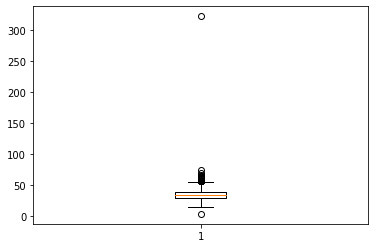

In [11]:
# See the distribution of the age with boxplot
print(df__['What is your age?'].min(), df__['What is your age?'].max())
plt.boxplot(df__['What is your age?'])
plt.show()

In [12]:
# delete unreasonable data with age less than 15 years old / above 70 years ald
df__ = df__[(df__['What is your age?'] >= 15) & (df__['What is your age?'] <= 70)]
print(df__.shape)

(1372, 18)


## 2-4 **EDA**
### 2-4-1. **Quantify yes-no result**
We can do one-hot encoding for categorical values, but in this dataset, most of the values are composed of Yes/No/Neutral. So we can change it to ordinal numbers.

Mapping is based on my subjectives, but I think it doesn't violate original data so much.

In [13]:
# Let's see what kind of expressions are used in the dataset
categorical = []
for column in df__:
    if df__[column].dtype == 'object':
        for v in df__[column].unique():
            categorical.append(v)
set(categorical)

{'Always',
 'F',
 "I don't know",
 'M',
 'Maybe',
 'Maybe/Not sure',
 'Neutral',
 'Never',
 'No',
 "No, I don't think it would",
 "No, I don't think they would",
 'No, it has not',
 'No, they do not',
 'Not applicable to me',
 'Not applicable to me (I do not have a mental illness)',
 'Not open at all',
 'Often',
 'Rarely',
 'Sometimes',
 'Somewhat not open',
 'Somewhat open',
 'Very open',
 'Yes',
 'Yes, I experienced',
 'Yes, I observed',
 'Yes, I think it would',
 'Yes, I think they would',
 'Yes, it has',
 'Yes, they do'}

In [14]:
# Below is the map I've created.

quantification_map = {
                     'Always': 3,
                     "I don't know": 1,
                     'Maybe': 1,
                     'Maybe/Not sure': 1,
                     'Neutral': 1,
                     'Never': 0,
                     'No': 0,
                     "No, I don't think it would": 0,
                     "No, I don't think they would": 0,
                     'No, it has not': 0,
                     'No, they do not': 0,
                     'Not applicable to me': 0,
                     'Not applicable to me (I do not have a mental illness)': 0,
                     'Not open at all': 0,
                     'Often': 2,
                     'Rarely': 1,
                     'Sometimes': 2,
                     'Somewhat not open': 2,
                     'Somewhat open': 1,
                     'Very open': 3,
                     'Yes': 3,
                     'Yes, I experienced': 3,
                     'Yes, I observed': 3,
                     'Yes, I think it would': 3,
                     'Yes, I think they would': 3,
                     'Yes, it has': 3,
                     'Yes, they do': 3,
                     'M': 1,
                     'F': 0
}

In [15]:
# Convert data with mapped values!
df_quant = df__.copy()
for column in df_quant:
    if df_quant[column].dtype == 'object':
        df_quant[column] = df_quant[column].map(quantification_map)

Let's see how the modiication changed the data 

In [16]:
df_quant.head()

,Are you self-employed?,Do you have previous employers?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Would you bring up a mental health issue with a potential employer in an interview?,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,How willing would you be to share with friends and family that you have a mental illness?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Do you have a family history of mental illness?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,Do you work remotely?
0,0,1,1,1,1,0,1,0,0,3,0,3,0,0,0,39,1,2
1,0,1,1,0,0,0,1,0,3,3,3,3,1,1,2,29,1,0
2,0,1,3,3,1,1,1,1,0,1,0,0,1,0,0,38,1,3
3,1,1,3,1,3,1,1,0,0,3,3,3,1,2,2,43,1,2
4,0,1,1,0,3,1,1,3,3,3,3,3,1,2,2,43,0,2


### 2-4-2. **Scale and see Correlation**
Now we can clearly see the correlation between the answers. We can see some correlations:

* Self-employed worker tends to work remotely
* People who has anxiety that mental health issue hurts their career tend to reflain from bringing up to potential employer and also colleagues.
* People suffering from mental health disorder tend to have the same disorder with their family, and also have past medical history.

In [17]:
# scale data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_quant[df_quant.columns])
df_scaled = pd.DataFrame(df_scaled, columns = df_quant.columns)

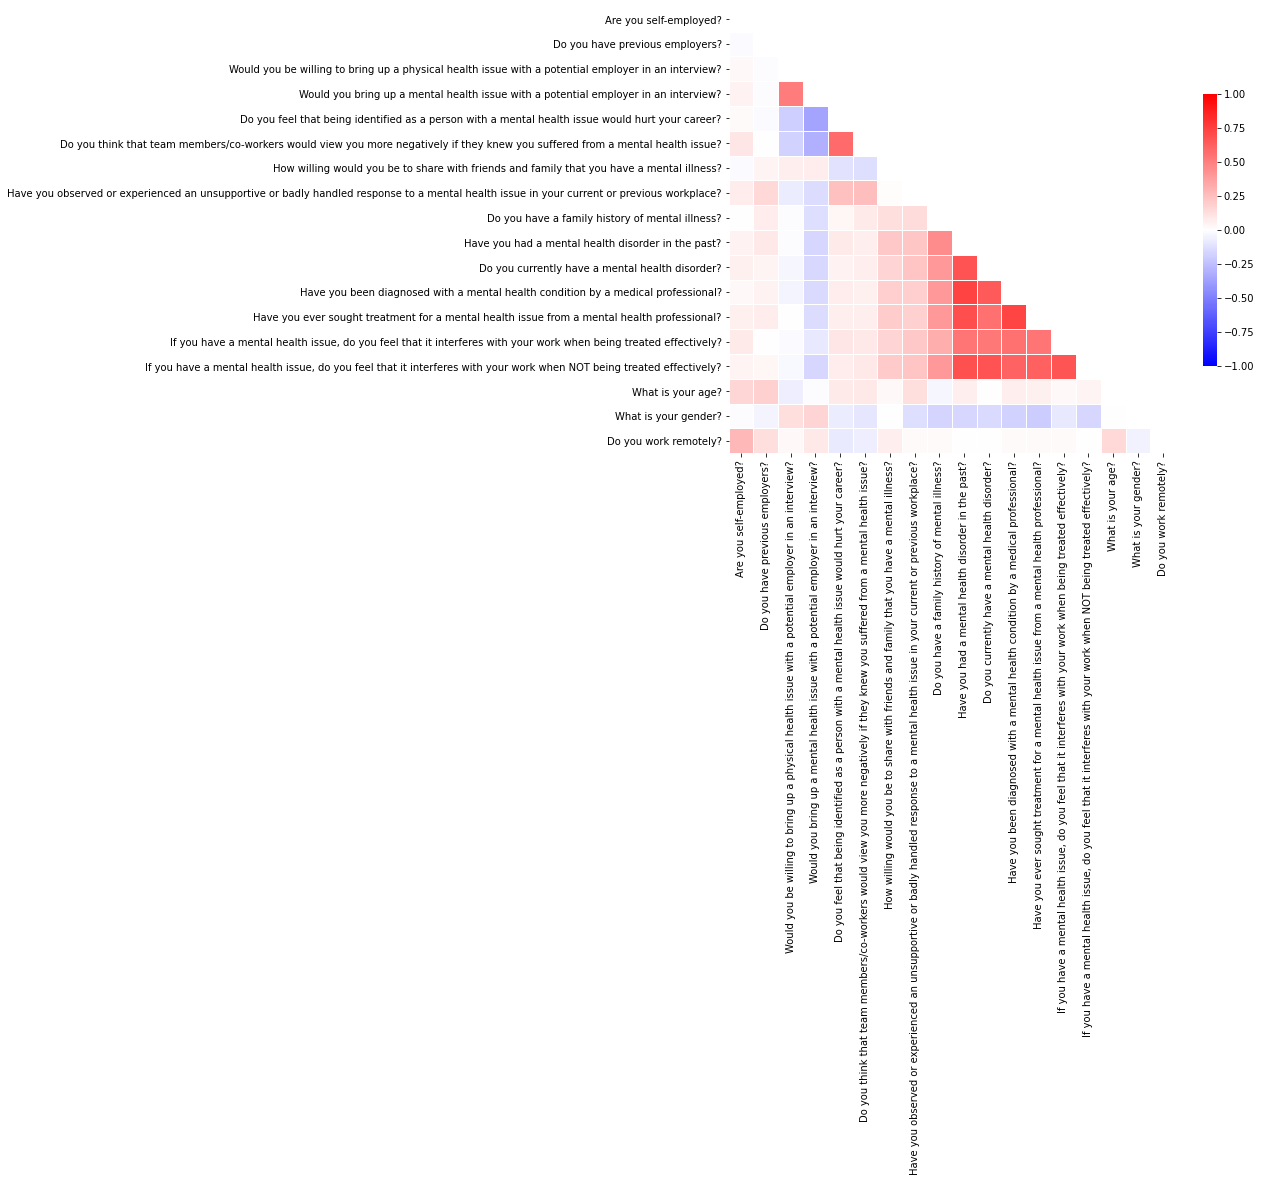

In [18]:
# See Spearman correlation
corr = df_scaled.corr(method ='spearman')
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cmap='bwr', mask=mask, vmax=1, vmin=-1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

***
# 3. **Develop Model**
## 3-1. **Train/Test Split**
I've used standard implementation of sklearn (`train_test_split`) for spliting data.

Ratio of test data is 20%, so there are 275 test data

In [19]:
# Split dataset into train/test data
train_X, test_X = train_test_split(df_quant, test_size=0.2)
train_y = train_X['Do you currently have a mental health disorder?'].reset_index(drop=True)
test_y = test_X['Do you currently have a mental health disorder?'].reset_index(drop=True)
train_X = train_X.drop('Do you currently have a mental health disorder?', axis=1).reset_index(drop=True)
test_X = test_X.drop('Do you currently have a mental health disorder?', axis=1).reset_index(drop=True)

print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(1097, 17) (275, 17) (1097,) (275,)


## 3-2. Basic Model
### 3-2-1. **Apply Model**

In [20]:
# simple random forest model
clf = RandomForestClassifier(max_depth=10, random_state=0, min_samples_leaf=3, n_estimators=100)
clf.fit(train_X, train_y)
pred = clf.predict(test_X)

### 3-2-2. **See Metrics**

In [21]:
confusion_matrix(pred, test_y)

array([[ 78,  13,   4],
       [  9,  20,   4],
       [ 17,  28, 102]], dtype=int64)

### 3-2-3. **See accuracy per tree depth**
Accuracy achieves its best at relatively small depth.

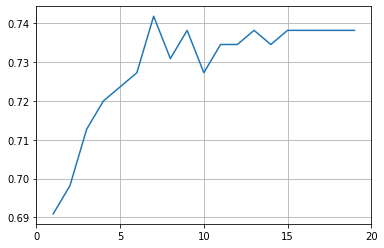

In [22]:
tree_depth = range(1,20)
accuracy_scores = []

for d in tree_depth:
    clf = RandomForestClassifier(max_depth=d, random_state=0, min_samples_leaf=3, n_estimators=100)
    clf.fit(train_X, train_y)
    pred = clf.predict(test_X)
    accuracy_scores.append(accuracy_score(pred, test_y))

plt.plot(tree_depth, accuracy_scores)
plt.grid()
plt.xticks([0, 5, 10, 15, 20])
plt.show()

## 3-3. **Simplified Model**
From correlation heatmap in 2-4-2, we can achieve nearly the same accuracy level with much simpler dataset.

### 3-3-1. **Apply Model**
Here I used only 6 explanatory variables which has strong correlation with target variable.

In [23]:
# Split dataset into train/test data
df_simplified = df_quant[
    [
        'Do you have a family history of mental illness?',
        'Have you had a mental health disorder in the past?',
        'Do you currently have a mental health disorder?',
        'Have you been diagnosed with a mental health condition by a medical professional?',
        'Have you ever sought treatment for a mental health issue from a mental health professional?',
        'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?',
        'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?'
    ]
]
train_X, test_X = train_test_split(df_simplified, test_size=0.2)
train_y = train_X['Do you currently have a mental health disorder?'].reset_index(drop=True)
test_y = test_X['Do you currently have a mental health disorder?'].reset_index(drop=True)
train_X = train_X.drop('Do you currently have a mental health disorder?', axis=1).reset_index(drop=True)
test_X = test_X.drop('Do you currently have a mental health disorder?', axis=1).reset_index(drop=True)

print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(1097, 6) (275, 6) (1097,) (275,)


In [24]:
# simple random forest model
clf = RandomForestClassifier(max_depth=10, random_state=0, min_samples_leaf=3, n_estimators=100)
clf.fit(train_X, train_y)
pred = clf.predict(test_X)

### 3-3-2. **See Metrics**

In [25]:
confusion_matrix(pred, test_y)

array([[ 69,  14,   2],
       [  5,  31,   4],
       [ 16,  32, 102]], dtype=int64)

### 3-3-3. **See accuracy per tree depth**
Accuracy achieves its best at very small depth.

Performance itself is a bit worse than full model, but very close to the original one.

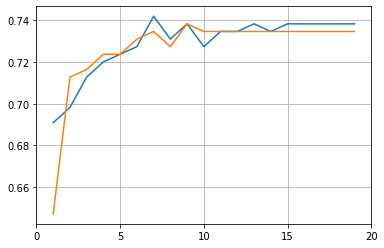

In [26]:
tree_depth = range(1,20)
accuracy_scores_simple = []

for d in tree_depth:
    clf = RandomForestClassifier(max_depth=d, random_state=0, min_samples_leaf=3, n_estimators=100)
    clf.fit(train_X, train_y)
    pred = clf.predict(test_X)
    accuracy_scores_simple.append(accuracy_score(pred, test_y))

plt.plot(tree_depth, accuracy_scores)
plt.plot(tree_depth, accuracy_scores_simple)
plt.grid()
plt.xticks([0, 5, 10, 15, 20])
plt.show()

***
# 4. **Conlusion**
In this report, mental health disorder is predicted from related questions done to the subject.

Unfortunately (I mean there was no surprising insight found), full model wasn't so differnt with simplified one, as there are relatively few correlation found other than that.

As the simplified model has too strong correlation with target variables, it would be more interesting to see if we can predict with the explanatory variables which seems irrelevant to the mental health disease.

And more, it would be interesting to predict other variables which may help to understand how people with mental disorder acts against certain situation. 